In [20]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 130

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/topology/plate_boundaries/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

print tpb


{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'type': u'Polyline', u'feature_type': u'gpml:ContinentalRift', u'coordinates': [[[35.08, -20.52], [35.94, -20.51], [36.8, -20.49], [37.75, -20.45], [38.71, -20.41], [39.66, -20.36], [40.56, -20.33], [41.45, -20.29], [42.35, -20.25], [43.24, -20.21], [44.27, -20.15], [45.29, -20.08], [46.31, -20.01], [47.33, -19.93], [48.35, -19.93], [49.36, -19.92], [50.38, -19.91], [51.39, -19.89], [52.22, -19.82], [53.05, -19.74], [53.88, -19.66], [54.85, -19.59], [55.81, -19.52], [56.78, -19.44], [57.75, -19.35], [58.19, -19.32]]]}, u'type': u'Feature'}, {u'geometry': {u'type': u'Polyline', u'feature_type': u'gpml:ContinentalRift', u'coordinates': [[[-104.56, -79.18], [-108.39, -79.88], [-111.98, -80.38], [-115.94, -80.84], [-120.29, -81.25], [-125.04, -81.61], [-130.4, -82.12], [-136.42, -82.55], [-143.09, -82.89], [-149.78, -83.27], [-157.15, -83.54], [-164.52, -84.1], [-173.23, -84.54], [-180.0, -84.72]]]}, u'type': u'Feature'}, {u'geo

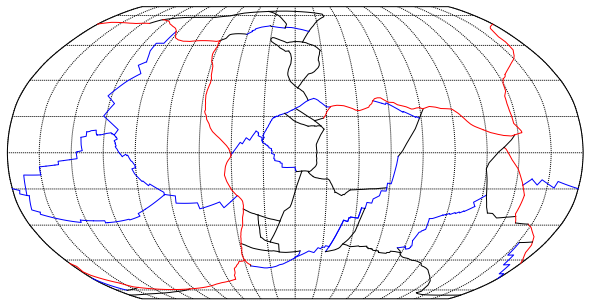

In [21]:
fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

for feature in tpb['features']:
    #print feature['geometry']
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    if feature['geometry']['feature_type']=='gpml:SubductionZone':
        m.plot(x,y,'r')
    elif feature['geometry']['feature_type']=='gpml:MidOceanRidge':
        m.plot(x,y,'b')
    else:
        m.plot(x,y,'k')
    
plt.show()

  
    